#Importing Libraries#

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

##2)LOAD THE DATASET##


In [ ]:
data=pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
print(data.shape)

(545, 12)


In [ ]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##3)Data Visualisations##

## a)Performing the Univariate Analysis##

<Axes: xlabel='price', ylabel='Count'>

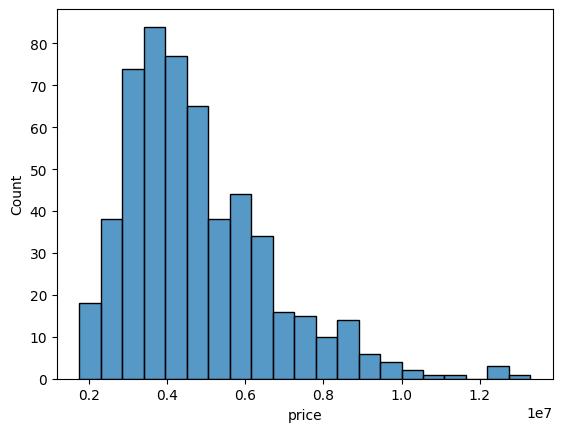

In [ ]:
#histogram
sns.histplot(data['price'])

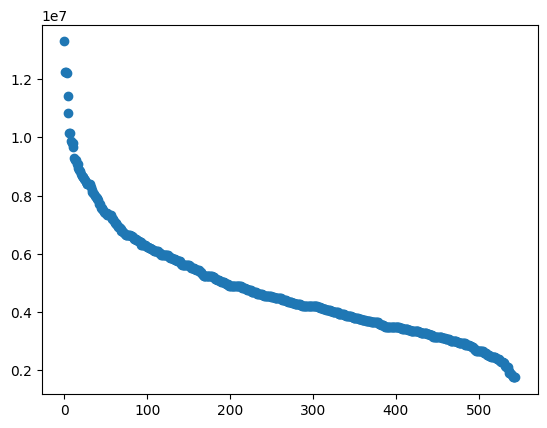

In [ ]:
#scatterplot
plt.scatter(data.index,data['price'])
plt.show()

<Axes: xlabel='price', ylabel='count'>

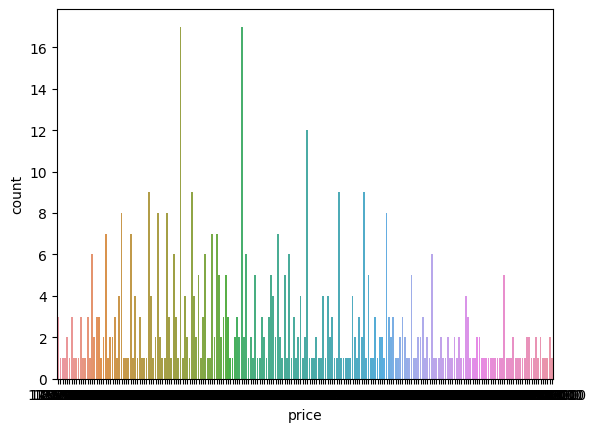

In [ ]:
sns.countplot(x=data['price'])

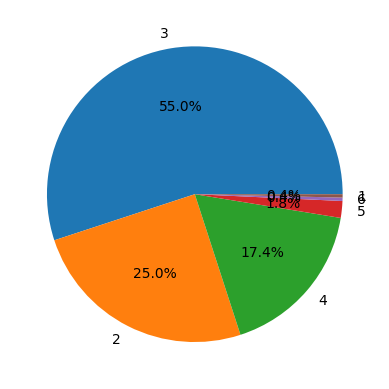

In [ ]:
x=data['bedrooms'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

##b)Bivarient Analysis##

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

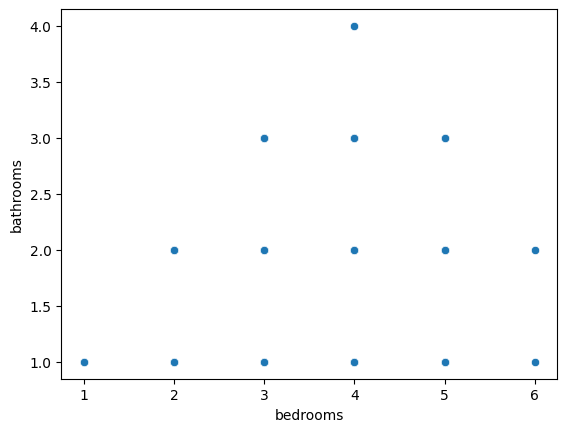

In [ ]:
sns.scatterplot(x=data['bedrooms'],
                y=data['bathrooms'])

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

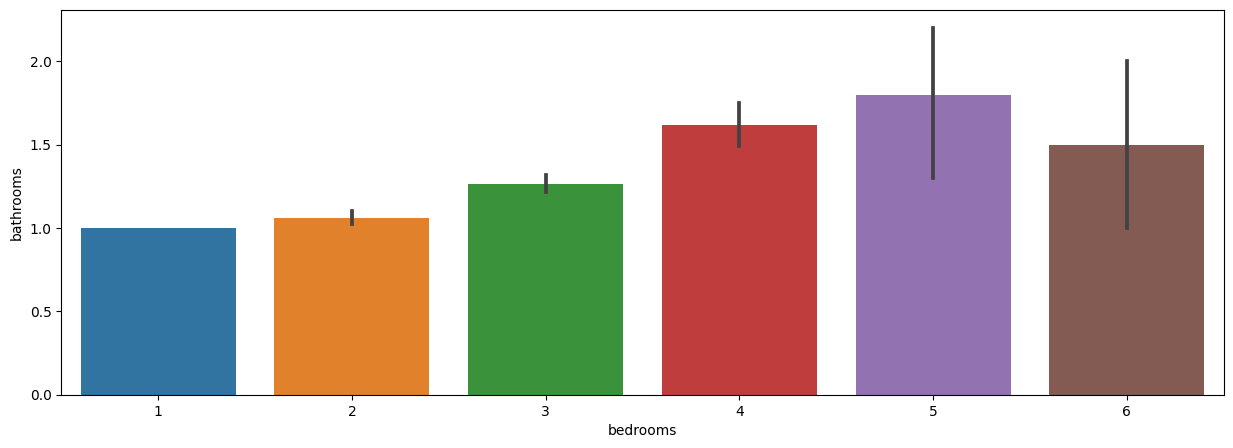

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data['bedrooms'], y=data['bathrooms'])


<Axes: xlabel='bedrooms', ylabel='count'>

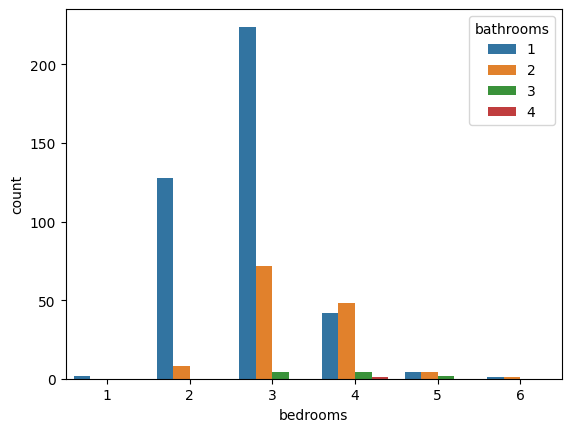

In [ ]:
sns.countplot(x=data['bedrooms'],hue=data['bathrooms'])

##c)Multivarient Analysis##

<ipython-input-20-a7d2a1a5130f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

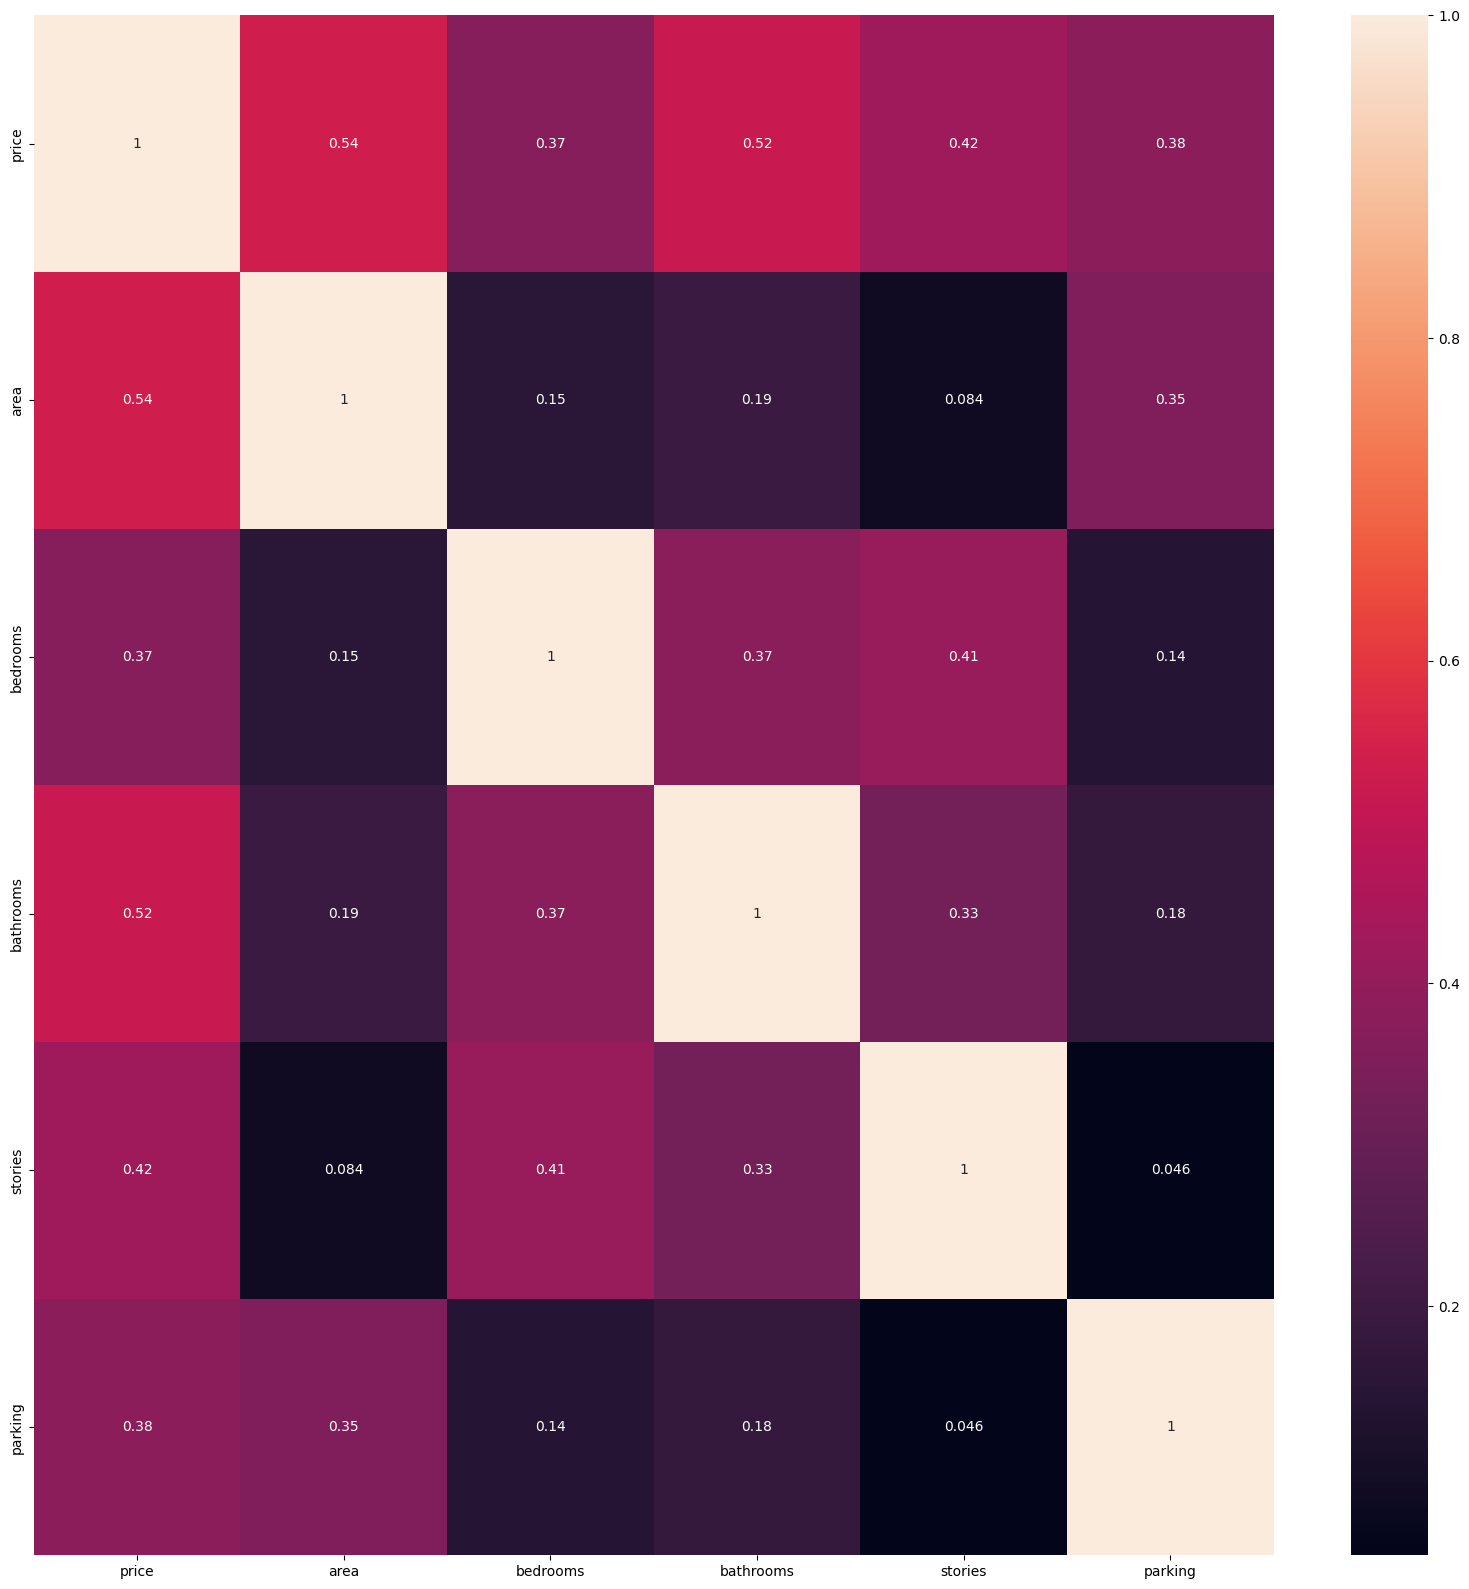

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

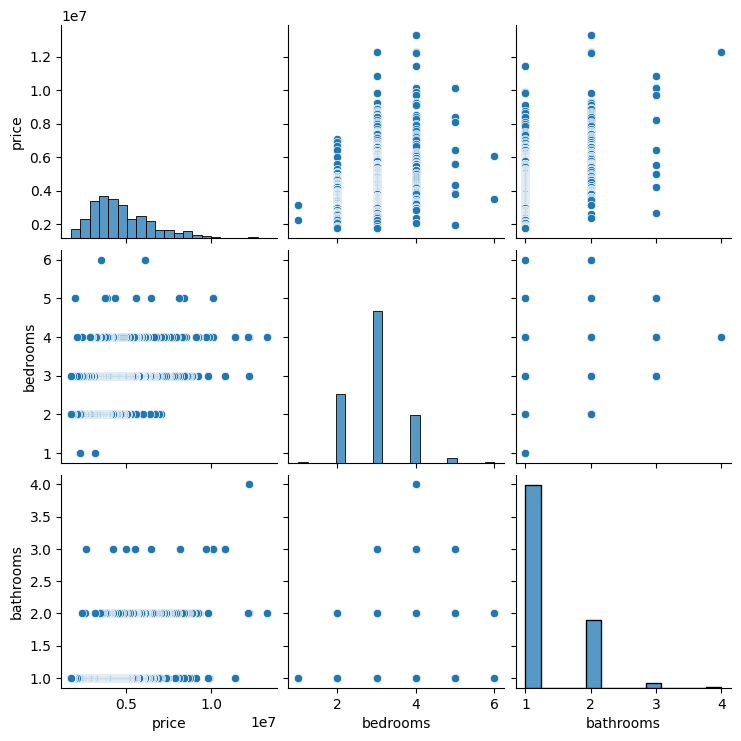

In [ ]:
 sns.pairplot(data[['price','bedrooms','bathrooms']])

## 4) Descriptive statistics

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.mean()

<ipython-input-23-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [ ]:
data.std()

<ipython-input-24-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [ ]:
data.cumsum()#cumulativesum

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,25550000,16380,8,6,7,yesyes,nono,nono,nono,yesyes,5,furnishedfurnished
2,37800000,26340,11,8,9,yesyesyes,nonono,nonoyes,nonono,yesyesno,7,furnishedfurnishedsemi-furnished
3,50015000,33840,15,10,11,yesyesyesyes,nononono,nonoyesyes,nononono,yesyesnoyes,10,furnishedfurnishedsemi-furnishedfurnished
4,61425000,41260,19,11,13,yesyesyesyesyes,nonononoyes,nonoyesyesyes,nonononono,yesyesnoyesyes,12,furnishedfurnishedsemi-furnishedfurnishedfurni...
...,...,...,...,...,...,...,...,...,...,...,...,...
540,2590850290,2794265,1605,697,979,yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...,nonononoyesnononoyesyesnoyesnonononoyesnoyesno...,nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...,nononononononononononoyesnoyesnonononononoyesn...,yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...,378,furnishedfurnishedsemi-furnishedfurnishedfurni...
541,2592617440,2796665,1608,698,980,yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...,nonononoyesnononoyesyesnoyesnonononoyesnoyesno...,nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...,nononononononononononoyesnoyesnonononononoyesn...,yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...,378,furnishedfurnishedsemi-furnishedfurnishedfurni...
542,2594367440,2800285,1610,699,981,yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...,nonononoyesnononoyesyesnoyesnonononoyesnoyesno...,nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...,nononononononononononoyesnoyesnonononononoyesn...,yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...,378,furnishedfurnishedsemi-furnishedfurnishedfurni...
543,2596117440,2803195,1613,700,982,yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...,nonononoyesnononoyesyesnoyesnonononoyesnoyesno...,nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...,nononononononononononoyesnoyesnonononononoyesn...,yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...,378,furnishedfurnishedsemi-furnishedfurnishedfurni...


## 5)Handle the Missing values

In [ ]:
#To find null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


## There is no null values in the data set
we can fill null values by fillna() method
(ie) df['columnname'].fillna(df['Columnname'].mode()[0], inplace=True)

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


#6) Find the outliers and replace them outliers#

<Axes: >

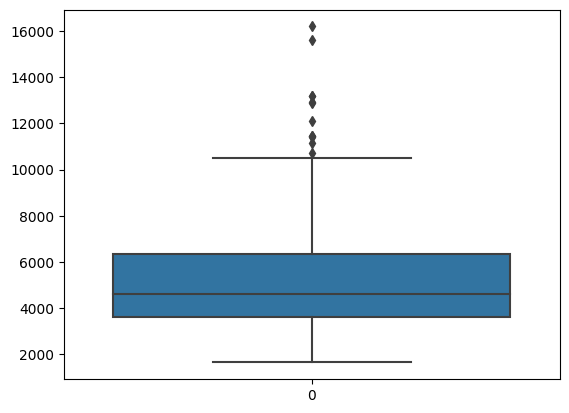

In [ ]:
#identifying outliers using boxplot
sns.boxplot(data['area'])

In [ ]:
print(np.where(data['area']>10000))#position of outlier

(array([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186,
       191, 211, 224, 277, 403]),)


In [ ]:
print(data['area'].quantile(0.50))
print(data['area'].quantile(0.95))
data['area']=np.where(data['area']>10000,6000,data['area'])
data.describe()

4600.0
9000.0


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,4954.783486,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,1753.951802,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6050.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,9960.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

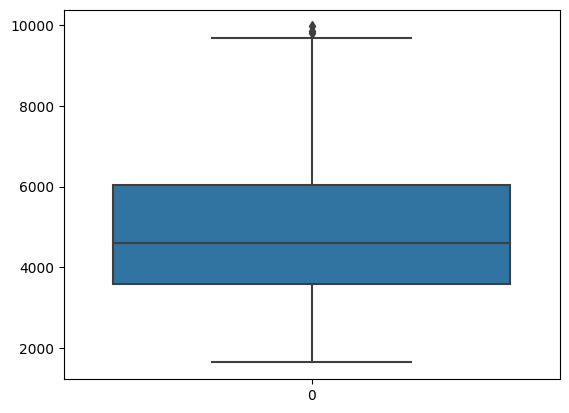

In [ ]:
#afterreplacing outliers
sns.boxplot(data['area'])

##7)Check for categorical columns and performing encoding##

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
data_numeric=data[['price','area','bedrooms','bathrooms','stories','parking']]
data_categorical=data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]

In [ ]:
data_numeric.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
data_categorical.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,yes,no,no,no,yes,furnished
1,yes,no,no,no,yes,furnished
2,yes,no,yes,no,no,semi-furnished
3,yes,no,yes,no,yes,furnished
4,yes,yes,yes,no,yes,furnished


In [ ]:
print(data['mainroad'].unique())
print(data['guestroom'].unique())
print(data['basement'].unique())
print(data['hotwaterheating'].unique())
print(data['airconditioning'].unique())
print(data['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
mainroad_encoder=LabelEncoder()

In [ ]:
mainroad_encoder.fit(data_categorical['mainroad'])

LabelEncoder()

In [ ]:
mainroad_values=mainroad_encoder.transform(data_categorical['mainroad'])

In [ ]:
print("Before encoding:",list(data_categorical['mainroad'][-10:]))
print("After Encoding:",mainroad_values[-10:])
print("The inverse from encoding result:",mainroad_encoder.inverse_transform(mainroad_values[-10:]))

Before encoding: ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes']
After Encoding: [1 0 1 1 0 1 0 1 0 1]
The inverse from encoding result: ['yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes']


##8)Split the Data into dependent and independent variables##

In [ ]:
x=data.iloc[:,:-1].values
print(x)

[[13300000 7420 4 ... 'no' 'yes' 2]
 [12250000 8960 4 ... 'no' 'yes' 3]
 [12250000 9960 3 ... 'no' 'no' 2]
 ...
 [1750000 3620 2 ... 'no' 'no' 0]
 [1750000 2910 3 ... 'no' 'no' 0]
 [1750000 3850 3 ... 'no' 'no' 0]]


In [ ]:
y=data.iloc[:,-1].values
print(y)

['furnished' 'furnished' 'semi-furnished' 'furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'unfurnished'
 'furnished' 'semi-furnished' 'semi-furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'furnished' 'furnished'
 'furnished' 'furnished' 'semi-furnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'furnished' 'unfurnished'
 'furnished' 'furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'furnished' 'furnished' 'unfurnished' 'semi-furnished'
 'furnished' 'semi-furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'furnished' 'semi-furnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'furnished'
 'semi-furnished' 'furnished' 'semi-furnished' 'semi-furnished'
 'furnished' 'furnished' 'furnished' 'furnished' 'furnished' 'unfurnished'
 'furnished' 'furnished' 's

##9)scale the Independent variables##

In [ ]:
#INitialize the Scaler
scaler=StandardScaler()


(array([ 25.,  74., 131.,  73.,  48., 106.,  37.,  27.,  17.,   7.]),
 array([-1.88592387, -1.41170136, -0.93747884, -0.46325633,  0.01096619,
         0.48518871,  0.95941122,  1.43363374,  1.90785625,  2.38207877,
         2.85630128]),
 <BarContainer object of 10 artists>)

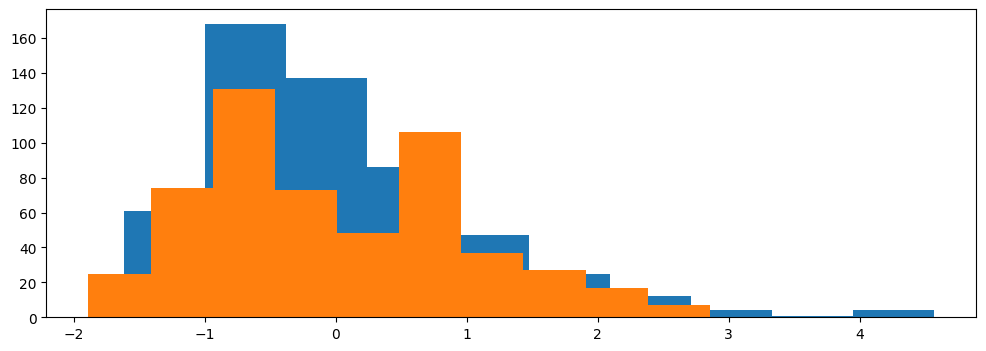

In [ ]:
#to scale data
fig,ax=plt.subplots(figsize=(12,4))
 
x_std=scaler.fit_transform(data_numeric)
ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

##10)Split the Data into Training and Testing##

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=0)

In [ ]:
x_train

array([[5530000, 3300, 3, ..., 'no', 'no', 0],
       [5950000, 6420, 3, ..., 'no', 'yes', 0],
       [4305000, 4400, 2, ..., 'no', 'no', 1],
       ...,
       [9800000, 5750, 3, ..., 'no', 'yes', 1],
       [3710000, 3600, 3, ..., 'no', 'no', 1],
       [5040000, 6600, 3, ..., 'no', 'no', 0]], dtype=object)

In [ ]:
y_train

array(['semi-furnished', 'furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'unfurnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'furnished', 'unfurnished',
       'furnished', 'unfurnished', 'unfurnished', 'unfurnished',
       'unfurnished', 'semi-furnished', 'unfurnished', 'unfurnished',
       'semi-furnished', 'furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'unfurnished', 'unfurnished',
       'furnished', 'semi-furnished', 'semi-furnished', 'unfurnished',
       'furnished', 'semi-furnished', 'unfurnished', 'furnished',
       'furnished', 'furnished', 'unfurnished', 'unfurnished',
       'furnished', 'semi-furnished', 'furnished', 'semi-furnished',
       'furnished', 'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'furnished', 'furnished', 'semi-furnished',
       'furnished', 'semi-furnished', 'semi-furnished', 'furnished',
       'semi-furnished', 

In [ ]:
x_test

array([[4585000, 4000, 3, 1, 2, 'yes', 'no', 'no', 'no', 'no', 1],
       [6083000, 9620, 3, 1, 1, 'yes', 'no', 'yes', 'no', 'no', 2],
       [4007500, 3460, 4, 1, 2, 'yes', 'no', 'no', 'no', 'yes', 0],
       [6930000, 6000, 2, 1, 1, 'yes', 'no', 'yes', 'yes', 'no', 1],
       [2940000, 3660, 4, 1, 2, 'no', 'no', 'no', 'no', 'no', 0],
       [6195000, 6350, 3, 2, 3, 'yes', 'yes', 'no', 'no', 'yes', 0],
       [3535000, 3850, 3, 1, 1, 'yes', 'no', 'no', 'no', 'no', 2],
       [2940000, 3480, 3, 1, 2, 'no', 'no', 'no', 'no', 'no', 1],
       [3500000, 3512, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 1],
       [7980000, 9000, 4, 2, 4, 'yes', 'no', 'no', 'no', 'yes', 2],
       [6755000, 6000, 4, 2, 4, 'yes', 'no', 'no', 'no', 'yes', 0],
       [3990000, 3960, 3, 1, 2, 'yes', 'no', 'no', 'no', 'no', 0],
       [3150000, 3450, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 0],
       [3290000, 6060, 3, 1, 1, 'yes', 'yes', 'yes', 'no', 'no', 0],
       [4130000, 5985, 3, 1, 1, 'yes', 'no', 'yes', '

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(28, 11)
(517, 11)
(28,)
(517,)


##11)Build the model##

In [ ]:
data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']] =data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']].astype('category')


In [ ]:
data.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
furnishingstatus    category
dtype: object

In [ ]:
X= data[['area', 'bedrooms', 'bathrooms','stories','parking']]  
Y= data[['price']]

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     area  bedrooms  bathrooms  stories  parking
265  2880         3          1        2        0
54   6000         3          2        2        1
171  6000         3          1        1        1
244  5320         3          1        2        0
268  4950         4          1        2        0
..    ...       ...        ...      ...      ...
330  4050         2          1        2        0
425  3185         2          1        1        2
209  6720         3          1        1        0
485  3630         2          1        1        0
518  3500         2          1        1        0

[218 rows x 5 columns]
[4200000 3500000 5250000 3500000 3500000 3500000 3500000 3500000 4270000
 5250000 4270000 5250000 4200000 5250000 3500000 4200000 3920000 3920000
 4270000 4200000 3500000 3500000 4200000 4270000 3500000 3500000 4200000
 3920000 5250000 3500000 4200000 3500000 4270000 3500000 5250000 3500000
 4200000 3500000 3500000 3500000 3500000 4200000 3500000 4200000 4200000
 4270000 3500000 364000

##12)Train the Model##

In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(model.coef_)

[[4.46857787e+02 1.21778617e+05 1.02466483e+06 5.47404086e+05
  2.92749451e+05]]


In [ ]:
print(model.intercept_)

[-324778.26041629]


##13)Test the Model##

In [ ]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(model.coef_, model.intercept_, 9.5)
print(score)


[[-320533.11143954  832118.60359606 9409537.58329356 4875560.56102723
  2456341.52305405]]


In [ ]:
 y_pred = model.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual     Predicted
265  4403000  3.446981e+06
54   7350000  6.158592e+06
171  5250000  4.586523e+06
244  4550000  4.537314e+06
268  4382000  4.493755e+06
..       ...           ...
330  3990000  3.848026e+06
425  3360000  3.499589e+06
209  4900000  4.615511e+06
485  2870000  3.112942e+06
518  2450000  3.054850e+06

[218 rows x 2 columns]


##14)Measure the performance using Metrics.##

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 953251.01
Mean squared error: 1684753087204.14
Root mean squared error: 1297980.39
